In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import pickle
import os

In [ ]:
PATH =  "/content/drive/MyDrive/PhD research/Stress Detection/Stress Detection/WESAD/WESAD"
SUBJECT_NO=17

In [ ]:
def getData(subjectNo):
  #data_set = r"C:\Users\A\Desktop\neural networks\WESAD-data\S2"
  pklPath = PATH + f'/S{subjectNo}/S{subjectNo}.pkl'

  with open(pklPath, 'rb') as f:
    s2_data = pickle.load(f, encoding='latin1')

  c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
  c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
  c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
  c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
  c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
  c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
  c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
  c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
  w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
  w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
  w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
  w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
  w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
  w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
  w_label=s2_data['label']

  numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
  numpy_data1=numpy_data1.T

  df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"])

  return df

In [ ]:
df = getData(SUBJECT_NO)
print(df.head())
print(df['w_label'].isnull().values.any())

     c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp    c_resp  \
0  0.7002 -0.1982 -1.0702  1.431793  0.007095  5.400467  32.415283  3.221130   
1  0.7294 -0.1902 -1.0470  1.461960 -0.012405  5.408859  32.434631  3.607178   
2  0.7646 -0.1840 -1.0046  1.471619 -0.018082  5.401611  32.445099  3.608704   
3  0.8014 -0.1778 -0.9782  1.472763 -0.027557  5.407715  32.439087  3.643799   
4  0.8348 -0.1608 -0.8950  1.469421 -0.026779  5.410385  32.439087  3.575134   

   w_label  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
False


In [ ]:
len(df)

4144000

In [ ]:
index = 0
df[index:index+int(60*700)]

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.7002,-0.1982,-1.0702,1.431793,0.007095,5.400467,32.415283,3.221130,0.0
1,0.7294,-0.1902,-1.0470,1.461960,-0.012405,5.408859,32.434631,3.607178,0.0
2,0.7646,-0.1840,-1.0046,1.471619,-0.018082,5.401611,32.445099,3.608704,0.0
3,0.8014,-0.1778,-0.9782,1.472763,-0.027557,5.407715,32.439087,3.643799,0.0
4,0.8348,-0.1608,-0.8950,1.469421,-0.026779,5.410385,32.439087,3.575134,0.0
...,...,...,...,...,...,...,...,...,...
41995,0.8536,0.0434,-0.0838,-0.098923,-0.036072,5.590439,32.354156,-1.023865,0.0
41996,0.8522,0.0454,-0.0850,-0.255020,-0.010574,5.590439,32.355652,-1.023865,0.0
41997,0.8536,0.0456,-0.0900,-0.356461,-0.015884,5.590439,32.363068,-1.026917,0.0
41998,0.8536,0.0478,-0.0926,-0.412262,0.024765,5.591965,32.360138,-1.022339,0.0


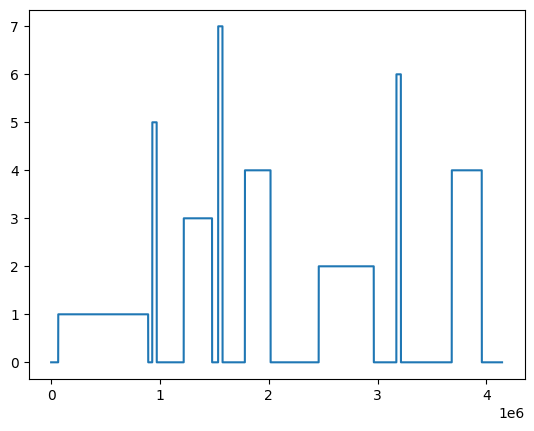

In [ ]:
plt.plot(df['w_label'])

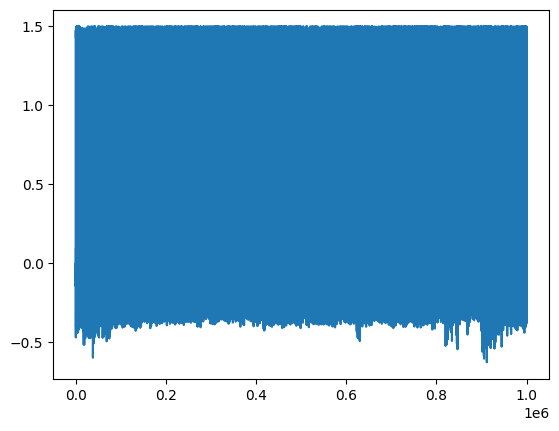

In [ ]:
plt.plot(df['c_ecg'][:int(1e6)])

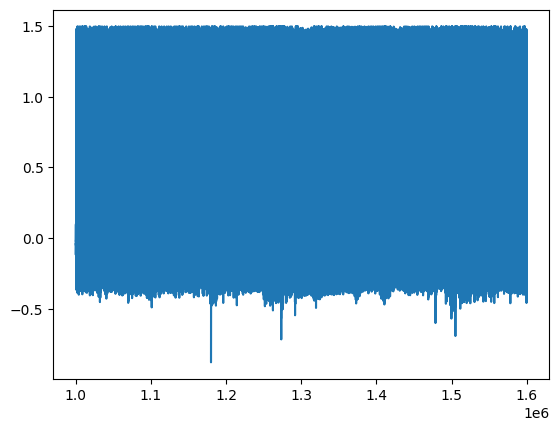

In [ ]:
plt.plot(df['c_ecg'][int(1e6): int(1.6e6)])

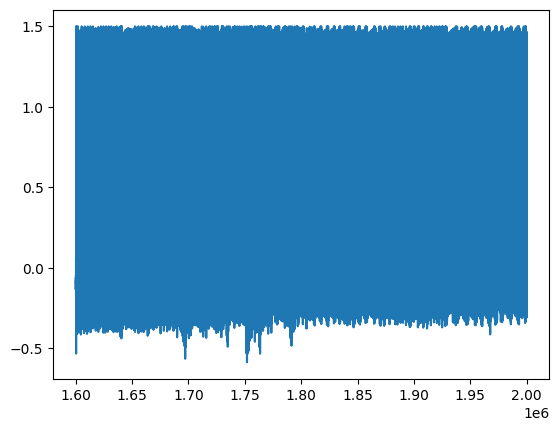

In [ ]:
plt.plot(df['c_ecg'][int(1.6e6):int(2e6)])

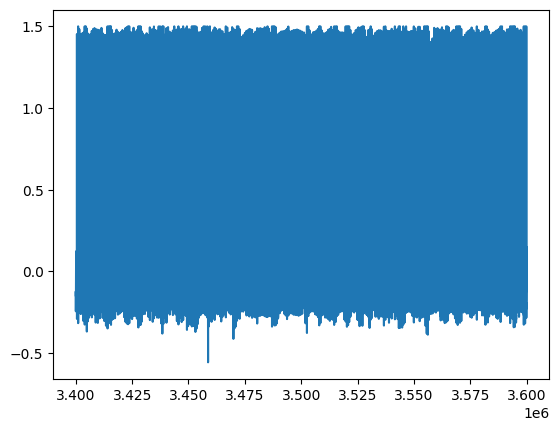

In [ ]:
plt.plot(df['c_ecg'][int(3.4e6):int(3.6e6)])

# Get only the intended class dataframe

In [ ]:
dfClass1 = df[df['w_label'].isin([1])]
dfClass2 = df[df['w_label'].isin([2])]
dfClass3 = df[df['w_label'].isin([3])]

In [ ]:
def dfWindow(df):
  index = 0
  dfList = []
  while(index+int(60*700)<len(df)):
    dfList.append(df[index:index+int(60*700)])
    index = index + int(0.25*700)
  return dfList

In [ ]:
os.mkdir(f'/content/drive/MyDrive/PhD research/Stress Detection/{SUBJECT_NO}')

In [ ]:
dfClass1.to_csv(f'/content/drive/MyDrive/PhD research/Stress Detection/{SUBJECT_NO}/{SUBJECT_NO}_Class_1.csv', index = False)
dfClass2.to_csv(f'/content/drive/MyDrive/PhD research/Stress Detection/{SUBJECT_NO}/{SUBJECT_NO}_Class_2.csv', index = False)
dfClass3.to_csv(f'/content/drive/MyDrive/PhD research/Stress Detection/{SUBJECT_NO}/{SUBJECT_NO}_Class_3.csv', index = False)